In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Building_Permits.csv")
df.head()
df.info()

/Users/steph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [4]:
# Slicing
df.iloc[5:6, 0:1] # To turn it to a dataframe, use slice
# iloc only uses the index
# loc can use index or the column name

,Permit Number
5,201706149344


In [5]:
df.loc[0:15, "Permit Number"]

0     201505065519
1     201604195146
2     201605278609
3     201611072166
4     201611283529
5     201706149344
6     201706300814
7          M803667
8          M804227
9          M804767
10         M805287
11         M805907
12         M806447
13    201707252846
14         M813729
15         M813907
Name: Permit Number, dtype: object

In [6]:
# Show permit number, pemrit crating date, estimated cost, revised cost
# df.loc[:, ["Permit Number", "Permit Creation Date", "Estimated Cost", "Revised Cost"]]
df1 = df.iloc[:, [0, 3, 25, 26]]
df1
# Use : to select all
# First dimension, call the rows
# Second dimension, call the columns
# to take everything
# df.iloc[:, 0:] no need to specify if you want to take till the last part

,Permit Number,Permit Creation Date,Estimated Cost,Revised Cost
0,201505065519,05/06/2015,4000.0,4000.0
1,201604195146,04/19/2016,1.0,500.0
2,201605278609,05/27/2016,20000.0,NaN
3,201611072166,11/07/2016,2000.0,2000.0
4,201611283529,11/28/2016,100000.0,100000.0
...,...,...,...,...
198895,M862628,12/05/2017,NaN,1.0
198896,201712055595,12/05/2017,5000.0,5000.0
198897,M863507,12/06/2017,NaN,1.0
198898,M863747,12/06/2017,NaN,1.0


In [7]:
# Filtering data
df2 = df[df["Estimated Cost"]==100000]["Estimated Cost"]
df2

4         100000.0
21        100000.0
22        100000.0
132       100000.0
136       100000.0
            ...   
198043    100000.0
198199    100000.0
198246    100000.0
198490    100000.0
198500    100000.0
Name: Estimated Cost, Length: 1767, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Number                           198900 non-null  object        
 1   Permit Type                             198900 non-null  int64         
 2   Permit Type Definition                  198900 non-null  object        
 3   Permit Creation Date                    198900 non-null  datetime64[ns]
 4   Block                                   198900 non-null  object        
 5   Lot                                     198900 non-null  object        
 6   Street Number                           198900 non-null  int64         
 7   Street Number Suffix                    2216 non-null    object        
 8   Street Name                             198900 non-null  object        
 9   Street Suffix                        

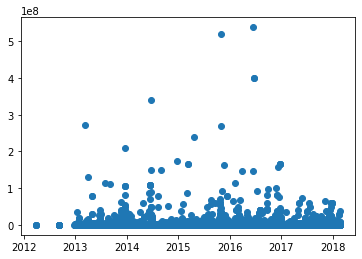

In [8]:
# plotting data to linear, bar, scatter, histogram
%matplotlib inline
# plt.style.use('seaborn-whitegrid')
df["Permit Creation Date"] = pd.to_datetime(df["Permit Creation Date"])
df.info()

fig = plt.figure()
ax = plt.axes()
x = df["Permit Creation Date"]
y = df["Estimated Cost"]
plt.scatter(x,y)

In [9]:
df.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12
